In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy
import matplotlib

import VoiceSingalAnalysis as voiana
import util_display as disp 

np.seterr(divide='ignore', invalid='ignore')

# 预设字体格式，并传给rc方法
font = {'family': 'SimHei', "size": 10}
matplotlib.rc('font', **font)
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# wav_file = r"./ResFiles/Wav/cmd_01_06_启动_停止_前进_后退_左转_右转.wav"

# nchs, sampdepth, Fs, npoints, wav_data = spec.load_wav(wav_file)
# wav_data = voiana.normalization_pn1(wav_data)
# disp.show_curve(wav_data)

In [3]:
# template_file = "./ResFiles/Wav/cmd_01_06_启动_停止_前进_后退_左转_右转.npz"
template_file = "./ResFiles/Wav/cmd_07_12_开机_关机_开灯_关灯_开门_关门.npz"
read_paras = np.load(template_file, allow_pickle=True)
print(read_paras.files)


['arr_0']


In [4]:
print(read_paras['arr_0'].shape)

(12,)


In [5]:
print(read_paras['arr_0'][0].shape)

(53, 160)


In [6]:
print(read_paras['arr_0'][1].shape)

(52, 160)


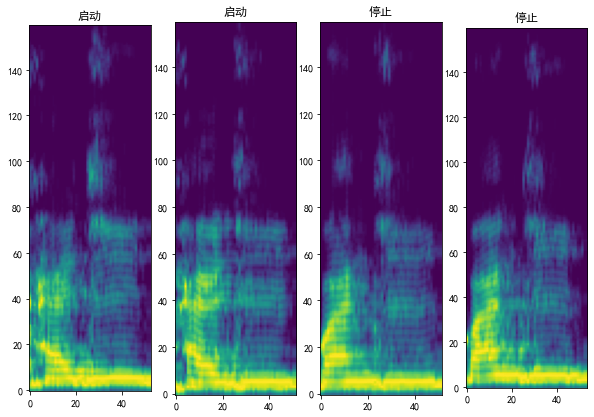

In [7]:
ana_0_pc = read_paras['arr_0'][0].T
ana_1_pc = read_paras['arr_0'][1].T
ana_2_pc = read_paras['arr_0'][2].T
ana_3_pc = read_paras['arr_0'][3].T

cmd_list = ["启动", "启动", "停止", "停止", 
            "前进", "前进", "后退", "后退", 
            "左转", "左转", "右转", "右转"]

plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow(ana_0_pc, origin='lower')
plt.title(cmd_list[0])
plt.subplot(142)
plt.imshow(ana_1_pc, origin='lower')
plt.title(cmd_list[1])
plt.subplot(143)
plt.imshow(ana_2_pc, origin='lower')
plt.title(cmd_list[2])
plt.subplot(144)
plt.imshow(ana_3_pc, origin='lower')
plt.title(cmd_list[3])
plt.show()

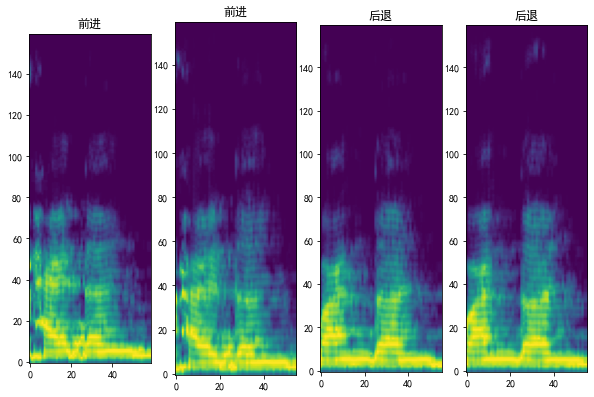

In [8]:
ana_0_pc = read_paras['arr_0'][4].T
ana_1_pc = read_paras['arr_0'][5].T
ana_2_pc = read_paras['arr_0'][6].T
ana_3_pc = read_paras['arr_0'][7].T

plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow(ana_0_pc, origin='lower')
plt.title(cmd_list[4])
plt.subplot(142)
plt.imshow(ana_1_pc, origin='lower')
plt.title(cmd_list[5])
plt.subplot(143)
plt.imshow(ana_2_pc, origin='lower')
plt.title(cmd_list[6])
plt.subplot(144)
plt.imshow(ana_3_pc, origin='lower')
plt.title(cmd_list[7])
plt.show()

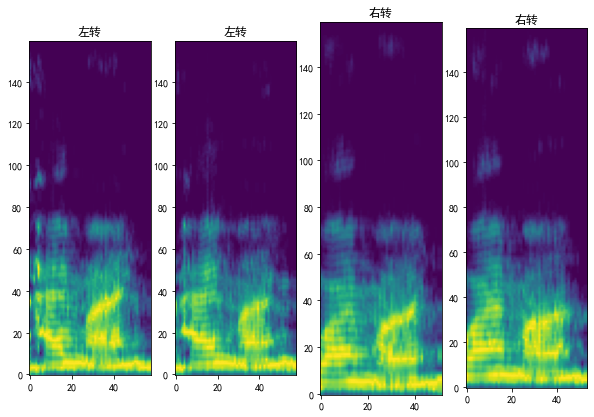

In [9]:
ana_0_pc = read_paras['arr_0'][8].T
ana_1_pc = read_paras['arr_0'][9].T
ana_2_pc = read_paras['arr_0'][10].T
ana_3_pc = read_paras['arr_0'][11].T

plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow(ana_0_pc, origin='lower')
plt.title(cmd_list[8])
plt.subplot(142)
plt.imshow(ana_1_pc, origin='lower')
plt.title(cmd_list[9])
plt.subplot(143)
plt.imshow(ana_2_pc, origin='lower')
plt.title(cmd_list[10])
plt.subplot(144)
plt.imshow(ana_3_pc, origin='lower')
plt.title(cmd_list[11])
plt.show()

In [10]:
print(ana_0_pc.shape)
print(ana_1_pc.shape)
print(ana_2_pc.shape)
print(ana_3_pc.shape)

(160, 58)
(160, 58)
(160, 52)
(160, 54)


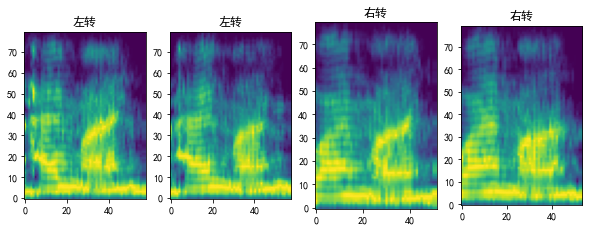

In [11]:
zuozhuan_01 = ana_0_pc[0:80,:]
zuozhuan_02 = ana_1_pc[0:80,:]
youzhuan_01 = ana_2_pc[0:80,:]
youzhuan_02 = ana_3_pc[0:80,:] 

plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow(zuozhuan_01, origin='lower')
plt.title(cmd_list[8])
plt.subplot(142)
plt.imshow(zuozhuan_02, origin='lower')
plt.title(cmd_list[9])
plt.subplot(143)
plt.imshow(youzhuan_01, origin='lower')
plt.title(cmd_list[10])
plt.subplot(144)
plt.imshow(youzhuan_02, origin='lower')
plt.title(cmd_list[11])
plt.show()

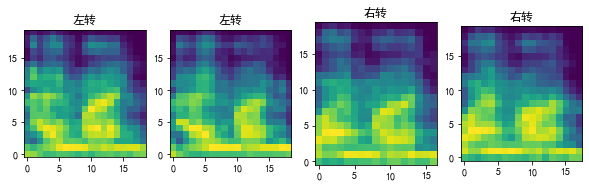

In [12]:
# 使用局部求和方式缩小2d Array
def img_zoom_out_on_sum(arr, w_step=2,v_step=2):
    _height, _width = arr.shape
    _w_out = _width//w_step
    _v_out = _height//v_step
    _outarr = np.zeros((_v_out, _w_out))
    for w in range(_w_out):
        for v in range(_v_out):
            _left = w * w_step
            _right = _left + w_step
            _bottom = v * v_step
            _top = _bottom + v_step
            _outarr[v,w] = np.sum(arr[_bottom:_top, _left:_right])
    return _outarr


zuozhuan_01_zoomout = img_zoom_out_on_sum(zuozhuan_01, w_step=3,v_step=4)
zuozhuan_02_zoomout = img_zoom_out_on_sum(zuozhuan_02, w_step=3,v_step=4)
youzhuan_01_zoomout = img_zoom_out_on_sum(youzhuan_01, w_step=3,v_step=4)
youzhuan_02_zoomout = img_zoom_out_on_sum(youzhuan_02, w_step=3,v_step=4)

plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow(zuozhuan_01_zoomout, origin='lower')
plt.title(cmd_list[8])
plt.subplot(142)
plt.imshow(zuozhuan_02_zoomout, origin='lower')
plt.title(cmd_list[9])
plt.subplot(143)
plt.imshow(youzhuan_01_zoomout, origin='lower')
plt.title(cmd_list[10])
plt.subplot(144)
plt.imshow(youzhuan_02_zoomout, origin='lower')
plt.title(cmd_list[11])
plt.show()

In [51]:
import sys 

def cal_d_hash(img,):
    pass

WordVoicePara = np.dtype([('word','U10'),
                        ('_version','int16'),
                        ('create_time', 'f8'),
                        ('spec_dhash', 'f4', (8,8)),
                        ('spec_zoom_out', 'f4',(16,16)), 
                        ('specgram', 'f4',(80,80)), 
                        ("wav_file", 'U60'),
                        ("samp_rate", "f4"),
                        ("start_idx", "int64"),
                        ("stop_idx", "int64"),
                        ("time_length", "f4"),
                         ("ext_info",'U50')]) 
print(WordVoiPara)

WordParaVector = np.zeros(32, dtype=WordVoicePara)
print(len(WordParaVector))
WordParaVector[0]['_version'] = "1000"
WordParaVector[0]['word'] = "左转"
WordParaVector[1]['word'] = "右转"
WordParaVector[2]['word'] = "左转"
WordParaVector[3]['word'] = "右转"
print(WordParaVector[1]['word'])
print(WordParaVector[0]['_version'])

print(WordParaVector[1]['word'] == '右转')
print(WordParaVector[1]['spec_zoom_out'].shape)
# print(WordParaVector[1]['spec_zoom_out'])

test_file = "./ResFiles/Wav/cmd_07_12_开机_关机_开灯_关灯_开门_关门.wav"
WordParaVector[1]['wav_file'] = test_file
print(WordParaVector[1]['wav_file'])

print(sys.getsizeof(WordParaVector[0]))
print(sys.getsizeof(WordParaVector))





[('word', '<U10'), ('para_version', '<i2'), ('create_time', '<f8'), ('spec_zoom_out', '<f4', (16, 16)), ('specgram', '<f4', (80, 80)), ('wav_file', '<U60'), ('samp_rate', '<i8'), ('start_idx', '<i8'), ('stop_idx', '<i8'), ('time_length', '<f4')]
32
右转
1000
True
(16, 16)
./ResFiles/Wav/cmd_07_12_开机_关机_开灯_关灯_开门_关门.wav
27450
876704


In [13]:
def cal_diff_specgram(img1, img2, bottom=0, top=1,
                      left=0, right=1, mode="relative"):
    return np.sum(abs(img1[bottom:top, left:right] - 
                      img2[bottom:top, left:right]))

_right = min(zuozhuan_01_zoomout.shape[1], zuozhuan_02_zoomout.shape[1])
_top = min(zuozhuan_01_zoomout.shape[0], zuozhuan_02_zoomout.shape[0])

print(_right)
print(_top)
diff_LL = cal_diff_specgram(zuozhuan_01_zoomout, 
                            zuozhuan_02_zoomout,
                            bottom=0, top=_top,
                            left=0, right=10)

print(diff_LL)
print(diff_LL/(10*_top))

diff_LL = cal_diff_specgram(zuozhuan_01_zoomout, 
                            zuozhuan_02_zoomout,
                            bottom=0, top=_top,
                            left=1, right=11)

print(diff_LL)
print(diff_LL/(10*_top))

19
20
178.0584745490347
0.8902923727451736
191.0287276321863
0.9551436381609315


In [14]:
_right = min(zuozhuan_01_zoomout.shape[1], youzhuan_01_zoomout.shape[1])
_top = min(zuozhuan_01_zoomout.shape[0], youzhuan_01_zoomout.shape[0])

print(_right)
print(_top)
diff_LL = cal_diff_specgram(zuozhuan_01_zoomout, 
                            youzhuan_01_zoomout,
                            bottom=0, top=_top,
                            left=0, right=_right)

print(diff_LL)
print(diff_LL/(_right*_top))

17
20
415.3687593247378
1.2216728215433466


In [15]:
_right = min(youzhuan_02_zoomout.shape[1], youzhuan_01_zoomout.shape[1])
_top = min(youzhuan_02_zoomout.shape[0], youzhuan_01_zoomout.shape[0])

print(_right)
print(_top)
diff_LL = cal_diff_specgram(youzhuan_02_zoomout, 
                            youzhuan_01_zoomout,
                            bottom=0, top=_top,
                            left=0, right=_right)

print(diff_LL)
print(diff_LL/_right/_top)

17
20
191.70674310999124
0.5638433620882095


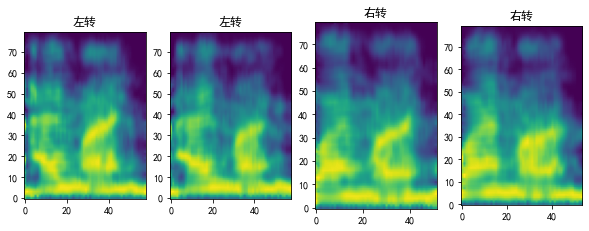

In [16]:
zuozhuan_01_avg = voiana.conv_avg9_2d(zuozhuan_01)
zuozhuan_02_avg = voiana.conv_avg9_2d(zuozhuan_02)
youzhuan_01_avg = voiana.conv_avg9_2d(youzhuan_01)
youzhuan_02_avg = voiana.conv_avg9_2d(youzhuan_02)

plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow(zuozhuan_01_avg, origin='lower')
plt.title(cmd_list[8])
plt.subplot(142)
plt.imshow(zuozhuan_02_avg, origin='lower')
plt.title(cmd_list[9])
plt.subplot(143)
plt.imshow(youzhuan_01_avg, origin='lower')
plt.title(cmd_list[10])
plt.subplot(144)
plt.imshow(youzhuan_02_avg, origin='lower')
plt.title(cmd_list[11])
plt.show()

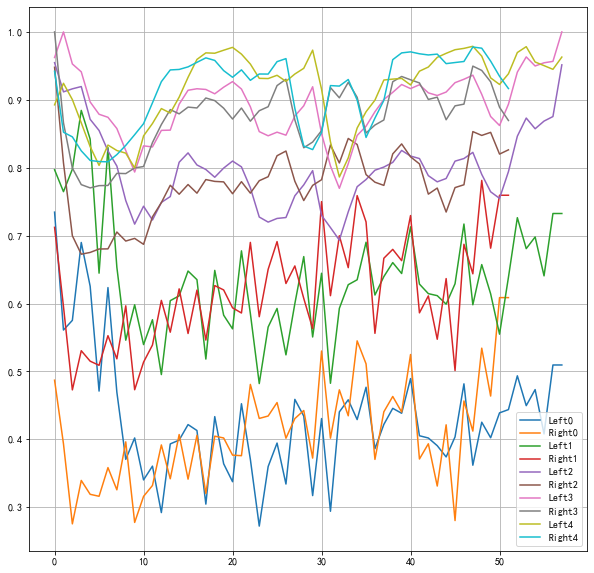

In [17]:
plt.figure(figsize=(10,10)) 
for i in range(5):
    _label = "Left" + str(i)
    plt.plot(zuozhuan_01_avg[i, 0:58], label=_label)
    _label = "Right" + str(i)
    plt.plot(youzhuan_01_avg[i, 0:58], label=_label)
plt.legend()
plt.grid(True)
plt.show()
    

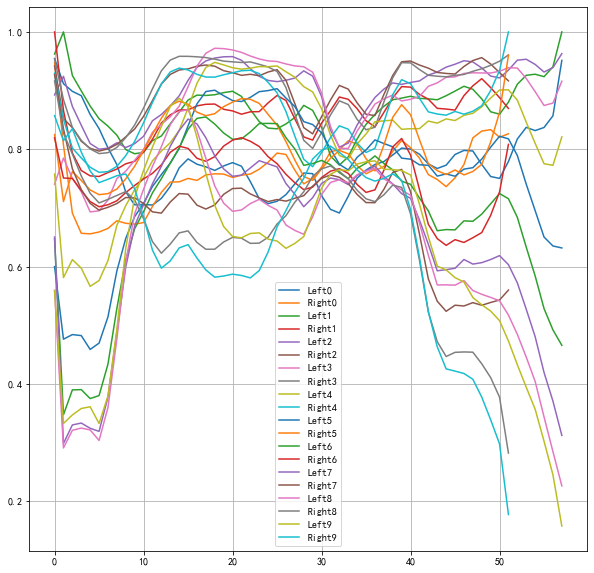

In [18]:
zuozhuan_01_avg2 = voiana.conv_avg9_2d(zuozhuan_01_avg)
zuozhuan_02_avg2 = voiana.conv_avg9_2d(zuozhuan_02_avg)
youzhuan_01_avg2 = voiana.conv_avg9_2d(youzhuan_01_avg)
youzhuan_02_avg2 = voiana.conv_avg9_2d(youzhuan_02_avg)

plt.figure(figsize=(10,10)) 
for i in range(10):
    _label = "Left" + str(i)
    plt.plot(zuozhuan_01_avg2[2+i, 0:58], label=_label)
    _label = "Right" + str(i)
    plt.plot(youzhuan_01_avg2[2+i, 0:58], label=_label)
plt.legend()
plt.grid(True) 
plt.show()

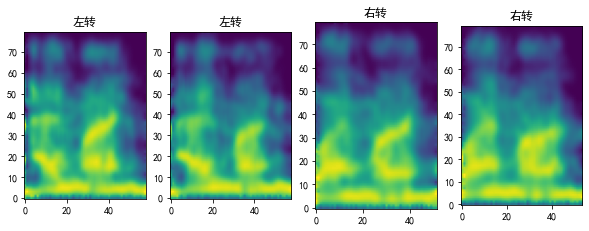

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow(zuozhuan_01_avg2, origin='lower')
plt.title(cmd_list[8])
plt.subplot(142)
plt.imshow(zuozhuan_02_avg2, origin='lower')
plt.title(cmd_list[9])
plt.subplot(143)
plt.imshow(youzhuan_01_avg2, origin='lower')
plt.title(cmd_list[10])
plt.subplot(144)
plt.imshow(youzhuan_02_avg2, origin='lower')
plt.title(cmd_list[11])
plt.show()

In [20]:


right_n = min(zuozhuan_01_avg.shape[1], zuozhuan_02_avg.shape[1])
print(right_n)
diff_LL = cal_diff_specgram(zuozhuan_01_avg, 
                            zuozhuan_02_avg,
                            2, 78,
                            0,right=right_n)

print(diff_LL)

58
356.820216066803


In [21]:
cross_diff = np.zeros((12,12))
for i in range(12):
    for j in range(12):
        imgi = read_paras['arr_0'][i].T
        imgj = read_paras['arr_0'][j].T
        imgi_avg2 = voiana.conv_avg9_2d(imgi)
        imgj_avg2 = voiana.conv_avg9_2d(imgj)
#         imgi_avg2 = voiana.conv_avg9_2d(imgi_avg)
#         imgj_avg2 = voiana.conv_avg9_2d(imgj_avg)
        if j <= i:
            _right = min(imgi_avg2.shape[1], imgj_avg2.shape[1]) 
            _top = min(imgi_avg2.shape[0], imgj_avg2.shape[0])
            cross_diff[i,j] = cal_diff_specgram(imgi_avg2,imgj_avg2,
                                                bottom=2,top=_top-2,
                                                left=2,right=_right-2)
for i in range(12):
    for j in range(12):
        if j > i:
            cross_diff[i,j] = cross_diff[j,i]

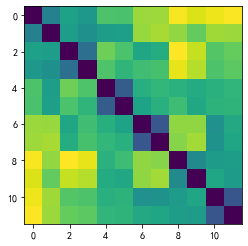

[[  0.         340.17408204 440.95763003 412.52298551 555.19778061
  549.7797657  655.50060554 660.29986377 763.55191787 729.80479
  753.76826935 766.48068891]
 [340.17408204   0.         433.38757094 386.30128816 433.57083773
  435.74655186 653.91147578 670.09462705 646.92193608 586.89168906
  663.01078857 655.9621933 ]
 [440.95763003 433.38757094   0.         281.713165   602.53248519
  552.84837147 452.48082423 476.90134257 771.88666307 705.16996518
  563.92692247 589.43876156]
 [412.52298551 386.30128816 281.713165     0.         558.66626291
  504.09038102 535.81247512 546.59906454 742.91441407 684.58304078
  556.74050047 576.82478887]
 [555.19778061 433.57083773 602.53248519 558.66626291   0.
  227.72663173 484.17860989 512.57349425 494.17160366 473.61027051
  489.46129449 509.06591105]
 [549.7797657  435.74655186 552.84837147 504.09038102 227.72663173
    0.         447.37996081 490.39752454 532.6709856  460.93794679
  499.79248033 502.70279774]
 [655.50060554 653.91147578 452.4

In [22]:
plt.imshow(cross_diff)
plt.show()
print(cross_diff)

207.7351830173561


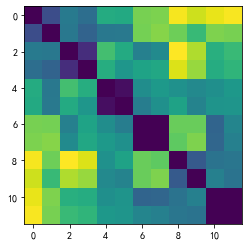

[[0.   0.23 0.41 0.36 0.62 0.61 0.79 0.8  0.99 0.93 0.97 0.99]
 [0.23 0.   0.4  0.32 0.4  0.4  0.79 0.82 0.78 0.67 0.81 0.79]
 [0.41 0.4  0.   0.13 0.7  0.61 0.43 0.48 1.   0.88 0.63 0.68]
 [0.36 0.32 0.13 0.   0.62 0.53 0.58 0.6  0.95 0.85 0.62 0.65]
 [0.62 0.4  0.7  0.62 0.   0.04 0.49 0.54 0.51 0.47 0.5  0.53]
 [0.61 0.4  0.61 0.53 0.04 0.   0.42 0.5  0.58 0.45 0.52 0.52]
 [0.79 0.79 0.43 0.58 0.49 0.42 0.   0.   0.77 0.77 0.32 0.46]
 [0.8  0.82 0.48 0.6  0.54 0.5  0.   0.   0.75 0.81 0.33 0.44]
 [0.99 0.78 1.   0.95 0.51 0.58 0.77 0.75 0.   0.28 0.38 0.39]
 [0.93 0.67 0.88 0.85 0.47 0.45 0.77 0.81 0.28 0.   0.44 0.38]
 [0.97 0.81 0.63 0.62 0.5  0.52 0.32 0.33 0.38 0.44 0.   0.  ]
 [0.99 0.79 0.68 0.65 0.53 0.52 0.46 0.44 0.39 0.38 0.   0.  ]]


In [23]:
_t_cross_diff = np.where(cross_diff<1, 1500,cross_diff)
min_diff = np.min(_t_cross_diff)
print(min_diff)
cross_diff = np.where(cross_diff>=min_diff, cross_diff-min_diff, cross_diff)
cross_diff_norm01 = voiana.normalization_01(cross_diff)
plt.imshow(cross_diff_norm01)
plt.show()
np.set_printoptions(precision=2)
print(cross_diff_norm01)

In [24]:
np.set_printoptions(precision=1)
print(cross_diff_norm01*100)

[[  0.   23.5  41.3  36.3  61.6  60.6  79.4  80.2  98.5  92.5  96.8  99. ]
 [ 23.5   0.   40.   31.7  40.   40.4  79.1  82.   77.8  67.2  80.7  79.5]
 [ 41.3  40.    0.   13.1  70.   61.2  43.4  47.7 100.   88.2  63.1  67.7]
 [ 36.3  31.7  13.1   0.   62.2  52.5  58.2  60.1  94.9  84.5  61.9  65.4]
 [ 61.6  40.   70.   62.2   0.    3.5  49.   54.   50.8  47.1  49.9  53.4]
 [ 60.6  40.4  61.2  52.5   3.5   0.   42.5  50.1  57.6  44.9  51.8  52.3]
 [ 79.4  79.1  43.4  58.2  49.   42.5   0.    0.4  77.3  77.3  32.1  45.6]
 [ 80.2  82.   47.7  60.1  54.   50.1   0.4   0.   75.2  80.8  33.1  43.7]
 [ 98.5  77.8 100.   94.9  50.8  57.6  77.3  75.2   0.   28.2  38.1  39.3]
 [ 92.5  67.2  88.2  84.5  47.1  44.9  77.3  80.8  28.2   0.   43.6  38.2]
 [ 96.8  80.7  63.1  61.9  49.9  51.8  32.1  33.1  38.1  43.6   0.    0. ]
 [ 99.   79.5  67.7  65.4  53.4  52.3  45.6  43.7  39.3  38.2   0.    0. ]]


In [25]:
_ASR_result = np.where(cross_diff_norm01>0.3, 0, 1)
print(_ASR_result)

[[1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 1]]


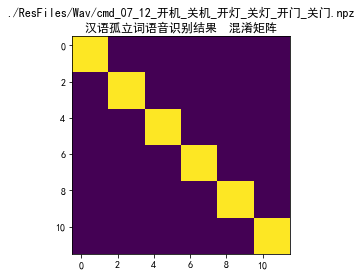

In [26]:
plt.imshow(_ASR_result)
plt.title(template_file+"\n汉语孤立词语音识别结果  混淆矩阵") 
plt.show()